# Продажа квартир в Санкт-Петербурге — анализ рынка недвижимости

Имеем данные о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно определить закономерности рыночной стоимости объектов недвижимости от других параметров.

### Задача проекта
Используя данные сервиса Яндекс.Недвижимость, определить рыночную стоимость объектов недвижимости и типичные параметры квартир

### Откроем файл с данными и изучим общую информацию. 

In [2]:
import pandas as pd

In [3]:
data = pd.read_csv('', sep='\t') # удалил в целях безопасности
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

По первому взгляду на данные, бросается в глаза столбец **"first_day_exposition"**. Во-первых, если все значения времени равны **"00:00:00"**, то мы сможем опустить время и оставить только год, месяц, число. Пока построем гистограмму по всей таблице, чтобы ознакомиться с данными.

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

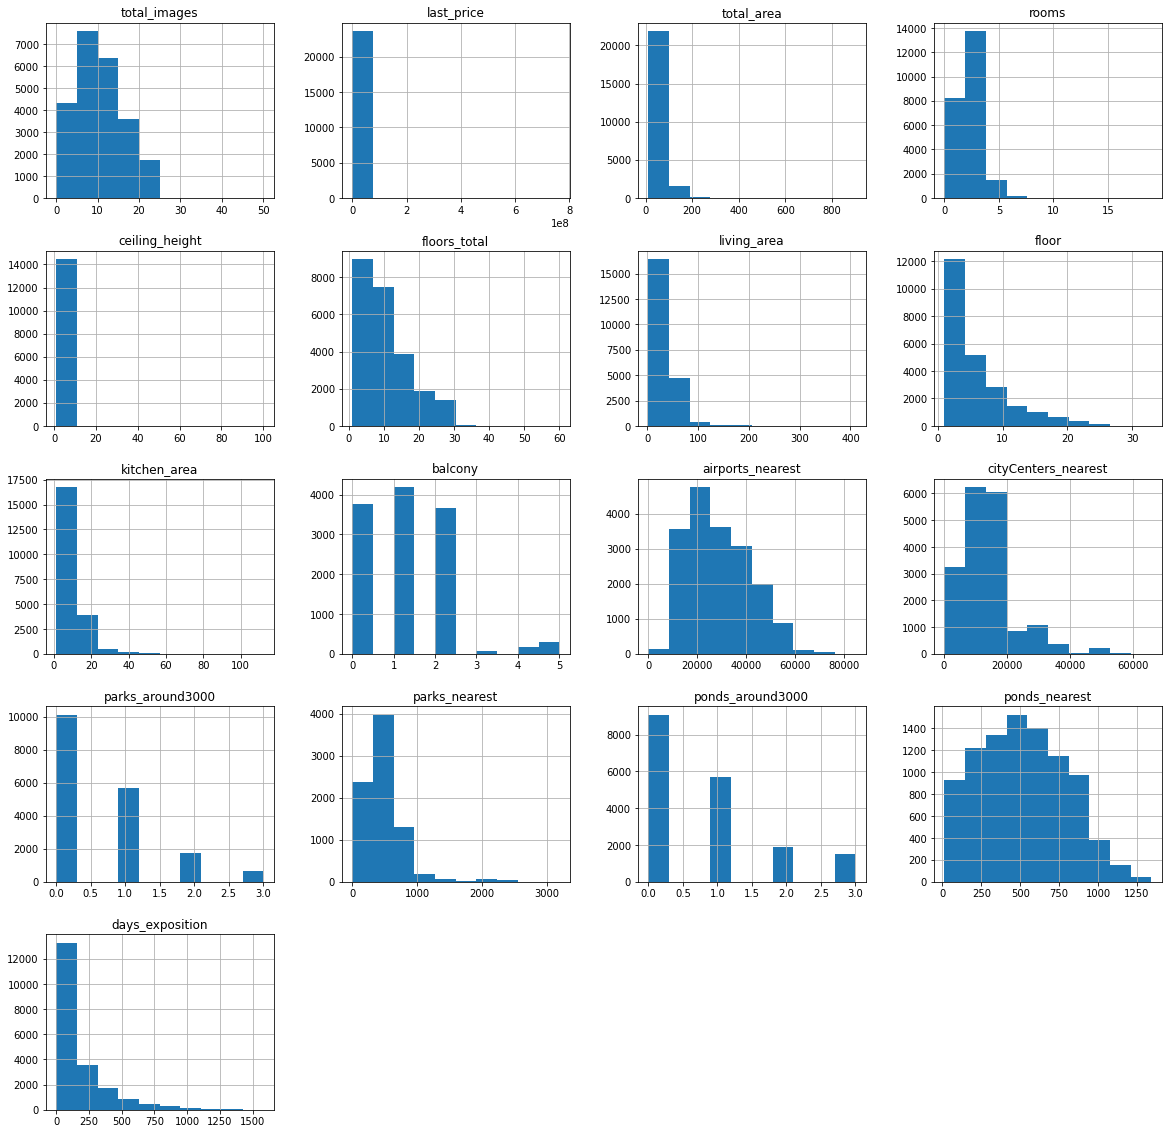

In [5]:
data.hist(figsize=(20,20))

Особых выводов по гистограммам сделать нельзя. Единственное, построим отдельно гистограмму для столбца **"last_price"**, так как слишком маленький масштаб.

array([[<AxesSubplot:title={'center':'last_price'}>]], dtype=object)

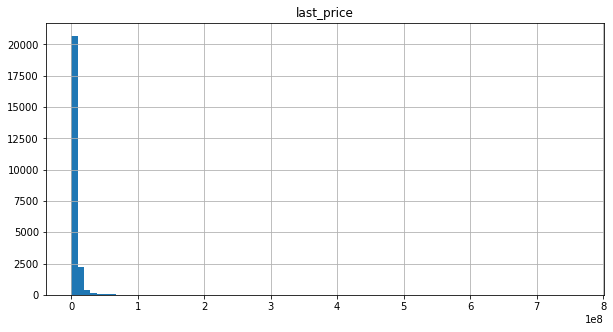

In [6]:
data.hist('last_price', bins=80, figsize=(10,5))

Стало чуть нагляднее. Видно, что львиная доля квартир оценивается в районе 10 млн рублей.

### Предобработка данных

Теперь обработаем пропуски в таблице. Первым делом, займёмся столбцом **"first_day_exposition"**. Тип данных этого столбца **"object"**. Изменим на **"datetime"**. Сделаем этот столбец более читаемым.

In [7]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%d')
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Исследуем другие пропуски в данных.

In [8]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Видно, в каких столбцах есть пропущенные значения. Попробуем обработать эти пропуски.

In [10]:
# пропуски в столбце "balcony" заполним нулями, так как, скорее всего, балкона в квартире нет, 
#раз значение оставили пустым.
data['balcony'] = data['balcony'].fillna(0)

# Столбец "is_apartment" заполним значеняими False в пропущенных местах. 
#Скорее всего, если значение пропущено, то квартира не является апартаментами.
data['is_apartment'] = data['is_apartment'].fillna(False)

# Пропущенные значения в столбце "kitchen_area" заполним средним значением.
data['kitchen_area'] = data['kitchen_area'].fillna(data['kitchen_area'].median())

# Пропуски в столбце "airports_nearest" заполним значением "-1". 
# Квартиры, которые имеют пропуск в этом столбце, распложены в деревнях, посёлках,
# небольших городах.
data['airports_nearest'] = data['airports_nearest'].fillna(-1)

data['living_area'] = data['living_area'].fillna(data['total_area']-data['kitchen_area'])

data['cityCenters_nearest'] = data['cityCenters_nearest'].fillna(-1)

# В столбцах "parks_around3000" и "ponds_around3000" пропущенные значения заполним "-1",
# так как предполагаем, что ни прудов, ни парков рядом нет.
data['parks_around3000'] = data['parks_around3000'].fillna(0)
data['ponds_around3000'] = data['ponds_around3000'].fillna(0)
data['parks_nearest'] = data['parks_nearest'].fillna(-1)
data['ponds_nearest'] = data['ponds_nearest'].fillna(-1)
data.head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.00,8,False,...,25.00,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04,1,NaN,11.0,18.60,1,False,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,-1.0,0.0,-1.0,81.0
2,10,5196000.0,56.00,2015-08-20,2,NaN,5.0,34.30,4,False,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24,3,NaN,14.0,149.90,9,False,...,9.10,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.00,13,False,...,41.00,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10,1,NaN,12.0,14.40,5,False,...,9.10,0.0,городской посёлок Янино-1,-1.0,-1.0,0.0,-1.0,0.0,-1.0,55.0
6,6,3700000.0,37.30,2017-11-02,1,NaN,26.0,10.60,6,False,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,-1.0,0.0,-1.0,155.0
7,5,7915000.0,71.60,2019-04-18,2,NaN,24.0,52.70,22,False,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,-1.0,0.0,-1.0,NaN
8,20,2900000.0,33.16,2018-05-23,1,NaN,27.0,15.43,26,False,...,8.81,0.0,посёлок Мурино,-1.0,-1.0,0.0,-1.0,0.0,-1.0,189.0
9,18,5400000.0,61.00,2017-02-26,3,2.50,9.0,43.60,7,False,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,-1.0,0.0,-1.0,289.0


In [11]:
# Посмотрим сколько теперь пропусков в данных
data.isna().sum()

total_images               0
last_price                 0
total_area                 0
first_day_exposition       0
rooms                      0
ceiling_height          9195
floors_total              86
living_area                0
floor                      0
is_apartment               0
studio                     0
open_plan                  0
kitchen_area               0
balcony                    0
locality_name             49
airports_nearest           0
cityCenters_nearest        0
parks_around3000           0
parks_nearest              0
ponds_around3000           0
ponds_nearest              0
days_exposition         3181
dtype: int64

Стало гораздо приятнее работать с данными. Остальные пропуски пока заполнять не будем. Сами пропуски могли возникнуть из-за человеческого фактора. Люди могли просто не вносить некоторые значения. Также, некоторые пропуски могли возникнуть при копировании данных. А сейчас посмотрим на типы данных в столбцах.

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        14504 non-null  float64       
 6   floors_total          23613 non-null  float64       
 7   living_area           23699 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          23699 non-null  float64       
 13  balcony         

In [13]:
# Изменим всё, что необходимо.
data['last_price'] = data['last_price'].astype('int')
# Чтобы изменить тип данных в столбце "floors_total", пока заполним пропуски "-1".
data['floors_total'] = data['floors_total'].fillna(-1)
data['floors_total'] = data['floors_total'].astype(int)
# Чтобы изменить тип данных в столбце "days_exposition", пока заполним пропуски "-1".
data['days_exposition'] = data['days_exposition'].fillna(-1) 
columns_to_change = ['balcony', 'airports_nearest', 'cityCenters_nearest','parks_around3000','parks_nearest',
         'ponds_around3000', 'ponds_nearest', 'days_exposition']
# столбцы, в которых нужно заменить тип данных
for value in columns_to_change:
    data[value] = data[value].astype('int')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  int64         
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        14504 non-null  float64       
 6   floors_total          23699 non-null  int64         
 7   living_area           23699 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          23699 non-null  float64       
 13  balcony         

**Типы данных изменены!**

Это необходимо для более приятного вида таблицы и для того, чтобы было удобнее работать с данными.

**Следующим шагом** изучим неявные дубликаты и избавимся от них.

In [14]:
# Прежде всего, заполним пропуски в столбце "locality_name" значениями "Not stated", чтобы было
# удобнее дальше работать с данными.
data['locality_name'] = data['locality_name'].fillna('Not stated')
# Выведем уникальные значения столбца "locality_name" и найдём неявные дубликаты.
data['locality_name'] = data['locality_name'].replace('посёлок.', 'поселок ', regex=True)
data['locality_name'] = data['locality_name'].replace('поселок.', 'поселок ', regex=True)
data['locality_name'] = data['locality_name'].replace('.городского типа.', ' ', regex=True)
data['locality_name'] = data['locality_name'].replace('городской.', '', regex=True)
data['locality_name'] = data['locality_name'].replace('коттеджный.', '', regex=True)
data['locality_name'] = data['locality_name'].replace('.при железнодорожной станции.', ' ', regex=True)
data = data.drop_duplicates()
#data.duplicated().sum()
data['locality_name'].unique()
#data.head(20)

array(['Санкт-Петербург', 'поселок Шушары', 'поселок Янино-1',
       'поселок Парголово', 'поселок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок Красный Бор', 'Гатчина', 'деревня Фёдоровское', 'Выборг',
       'Кронштадт', 'Кировск', 'деревня Новое Девяткино',
       'поселок Металлострой', 'поселок Лебяжье', 'поселок Сиверский',
       'поселок Молодцово', 'поселок Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'поселок Аннино',
       'поселок Ефимовский', 'поселок Плодовое', 'деревня Заклинье',
       'поселок Торковичи', 'поселок Первомайское', 'Красное Село',
       'поселок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', 'поселок Новый Свет', 'Сланцы',
       'село Путилово', 'Ивангород', 'Мурино', 'Шлиссельбург',
       'Никольское', 'Зелено

Мы сделали значения в столбце **"locality_name"** более приятными для обработки.

Теперь найдем выбивающиеся значения.

In [15]:
#data.head(15)
#data.hist('ceiling_height', bins=20)
# Смущают значения, которые находятся в районе 25 м. 
# Заполним пропуски значениями "-1", чтобы удобнее работать с данными.
data['ceiling_height'] = data['ceiling_height'].fillna(-1)
# Высота потолка 27 м. Логично предположить, что на самом деле 2.7 м. Выполним замену.
data.loc[data['ceiling_height'] >= 20, 'ceiling_height'] = data['ceiling_height']/10
# После построения гистограмм, других выбивающихся значений я не выявил.

Я построил отдельно гистограммы по каждому столбцу. Выбивающееся значение нашёл только в столбце **"ceiling_height"**.

### Посчитаем и добавим в таблицу новые столбцы

In [16]:
# цена одного квадратного метра
data['price_one_meter'] =  data['last_price']/data['total_area']
# день недели, месяц, год публикации
for i in range(len(data)):
    data.loc[i, 'weekday'] = pd.Timestamp(data.loc[i, 'first_day_exposition']).weekday()
    data.loc[i, 'month'] = pd.Timestamp(data.loc[i, 'first_day_exposition']).strftime('%B')
    data.loc[i, 'year'] = pd.Timestamp(data.loc[i, 'first_day_exposition']).year
data['weekday'] = pd.to_numeric(data['weekday'], errors='coerce', downcast='integer')
data['year'] = pd.to_numeric(data['year'], errors='coerce', downcast='integer')
#data.head(20)

In [17]:
# тип этажа квартиры
def what_floor(data):
    if data.loc['floor'] == 1:
        return 'первый'
    elif data.loc['floor'] == data.loc['floors_total']:
        return 'последний'
    else:
        return 'другой'

data['what_floor'] = data.apply(what_floor, axis=1)

In [18]:
# расстояние до центра города
def center_km(data):
    if data.loc['cityCenters_nearest'] == -1:
        return -1
    else:
        return round(data.loc['cityCenters_nearest']/1000)
data['center_km'] = data.apply(center_km, axis=1)
#data.info()

### Проведем исследовательский анализ данных

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23699 entries, 0 to 23698
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  int64         
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        23699 non-null  float64       
 6   floors_total          23699 non-null  int64         
 7   living_area           23699 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          23699 non-null  float64       
 13  balcony         

<AxesSubplot:>

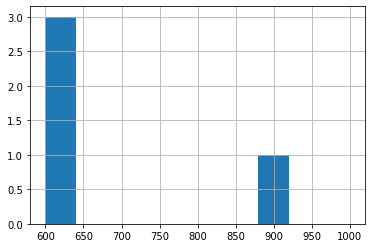

In [20]:
# Общая площадь
data['total_area'].hist(range=(600,1000))

Квартира площадью 900 квадратных метров... Удалим этот выброс.

<AxesSubplot:>

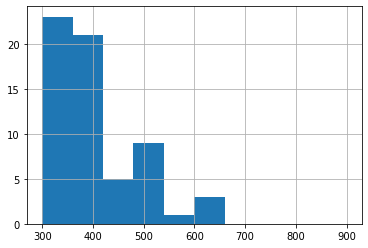

In [21]:
data=data.query('total_area<850')
data['total_area'].hist(range=(300,900))

<AxesSubplot:>

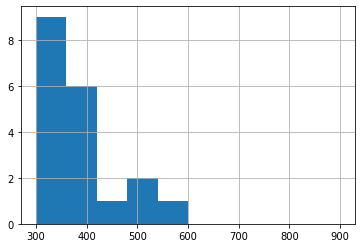

In [22]:
# Жилая площадь
data['living_area'].hist(range=(300,900))

Заметно выбивающихся значений нет.

<AxesSubplot:>

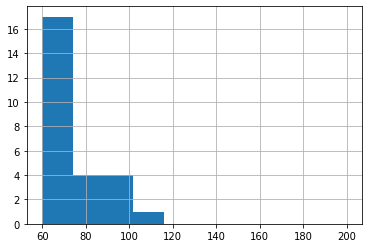

In [23]:
# Площадь кухни
data['kitchen_area'].hist(range=(60,200))

Выбросов не наблюдается.

<AxesSubplot:>

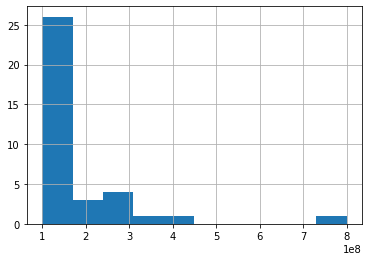

In [24]:
# Цена объекта
data['last_price'].hist(range=(100000000,800000000))

Есть квартира стоимостью порядка 700 млн. руб <br> Разделим число на 10. Думаю в данных лишний разряд.

<AxesSubplot:>

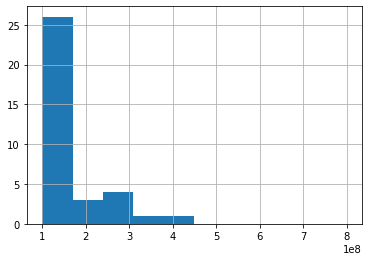

In [25]:
data.loc[data['last_price']>700000000, 'last_price'] = data['last_price'] / 10
data['last_price'].hist(range=(100000000, 800000000))

Обработали выбивающееся значение.

<AxesSubplot:>

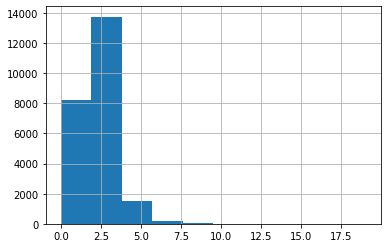

In [26]:
# Количество комнат
data['rooms'].hist()

Здесь всё хорошо с данными.

<AxesSubplot:>

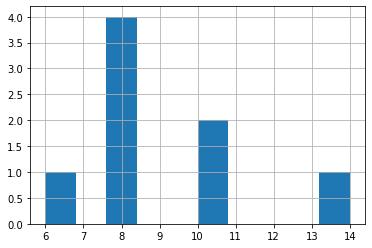

In [27]:
# Высота потолков
data['ceiling_height'].hist(range=(6,14))

Особенно выделяющихся значений нет.

<AxesSubplot:>

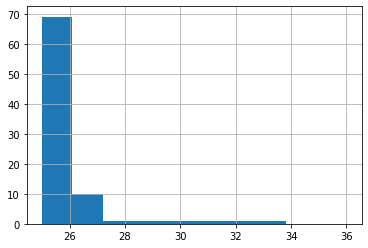

In [28]:
# Этаж квартиры
data['floor'].hist(range=(25, 36))

Здесь выбросов в данных тоже нет.

<AxesSubplot:>

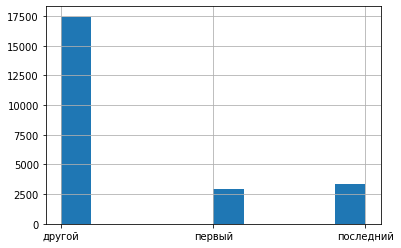

In [29]:
# Тип этажа
data['what_floor'].hist()

Большинство квартир между первым и последним этажами, что логично.

2253           Кронштадт
16731    Санкт-Петербург
Name: locality_name, dtype: object

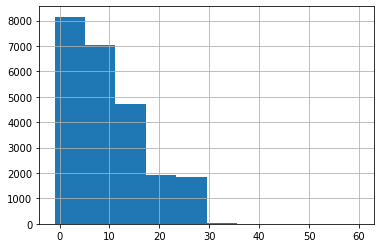

In [30]:
# Общее кол-во этажей в доме
data['floors_total'].hist()
data.query('floors_total >40')['locality_name']

Не могу представить, что в Питере есть дом c пятьюдесеятью этажами, да и в Кронштадте... Удалим эти строки из таблицы.

<AxesSubplot:>

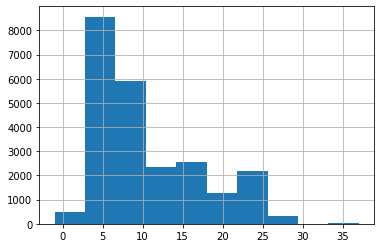

In [31]:
data=data.query('floors_total<45')
data['floors_total'].hist()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_one_meter,weekday,month,year,what_floor,center_km
577,7,4000000.0,59.0,2017-07-23,3,2.50,5,37.0,1,False,...,-1,0,-1,-1,67796.610169,6,July,2017,первый,66
2974,13,3200000.0,46.3,2018-03-31,2,2.50,3,29.2,2,False,...,-1,0,-1,205,69114.470842,5,March,2018,другой,62
5218,15,3650000.0,53.8,2018-09-24,3,2.50,4,36.9,3,False,...,-1,0,-1,121,67843.866171,0,September,2018,другой,65
5340,19,3600000.0,50.6,2019-03-19,2,2.50,5,29.9,4,False,...,-1,0,-1,-1,71146.245059,1,March,2019,другой,66
9640,8,4200000.0,51.4,2014-12-10,2,2.55,5,31.0,2,False,...,-1,0,-1,1194,81712.062257,2,December,2014,другой,66
16569,13,3200000.0,52.8,2017-06-20,2,2.55,5,29.9,3,False,...,223,0,-1,240,60606.060606,1,June,2017,другой,61
18884,15,3600000.0,57.6,2019-02-08,3,2.55,3,41.3,2,False,...,-1,0,-1,13,62500.000000,4,February,2019,другой,63
20746,1,3300000.0,43.5,2016-02-16,2,2.55,4,27.2,2,False,...,-1,0,-1,1043,75862.068966,1,February,2016,другой,65
23123,0,1800000.0,32.0,2018-07-17,1,-1.00,2,17.0,1,False,...,17,0,-1,147,56250.000000,1,July,2018,первый,60


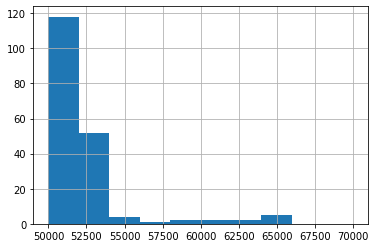

In [32]:
# Расстояние до центра в метрах
data['cityCenters_nearest'].hist(range=(50000,70000))
data.query('cityCenters_nearest >60000')

Представленные квартиры имеют низкую стоимость одного квадратного метра. Возможно из-за того, что они расположены далеко от центра.

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_one_meter,weekday,month,year,what_floor,center_km
302,6,3500000.0,31.0,2016-04-05,1,2.55,5,17.5,1,False,...,92,1,571,168,112903.225806,1,April,2016,первый,53
376,18,8400000.0,84.0,2018-06-26,2,2.75,3,41.0,1,False,...,-1,0,-1,201,100000.000000,1,June,2018,первый,55
577,7,4000000.0,59.0,2017-07-23,3,2.50,5,37.0,1,False,...,-1,0,-1,-1,67796.610169,6,July,2017,первый,66
939,17,3015000.0,31.2,2019-04-16,1,2.50,3,17.5,1,False,...,-1,1,347,-1,96634.615385,1,April,2019,первый,57
2036,19,6100000.0,50.0,2018-03-24,2,2.60,5,29.0,5,False,...,37,1,926,72,122000.000000,5,March,2018,последний,53
2974,13,3200000.0,46.3,2018-03-31,2,2.50,3,29.2,2,False,...,-1,0,-1,205,69114.470842,5,March,2018,другой,62
3477,4,6400000.0,67.2,2016-10-10,3,-1.00,6,43.0,1,False,...,112,1,408,316,95238.095238,0,October,2016,первый,53
3936,10,4250000.0,38.0,2017-11-30,1,2.70,3,20.0,3,False,...,533,2,123,179,111842.105263,3,November,2017,последний,53
4441,6,2300000.0,31.0,2016-05-26,1,-1.00,3,12.0,1,False,...,-1,0,-1,232,74193.548387,3,May,2016,первый,60
4906,11,5500000.0,49.0,2017-10-24,2,2.50,5,29.0,3,False,...,296,2,521,25,112244.897959,1,October,2017,другой,53


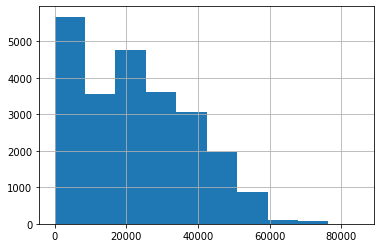

In [33]:
# Расстояние до аэропорта
data['airports_nearest'].hist()
data.query('airports_nearest >70000')

Необычных значений нет. Оставим все данные в таблице.

<AxesSubplot:>

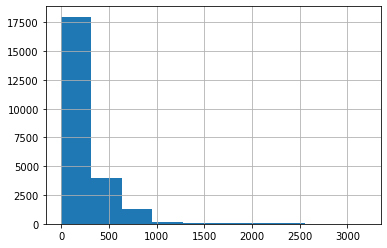

In [34]:
# Расстояние до парка
data['parks_nearest'].hist()

<AxesSubplot:>

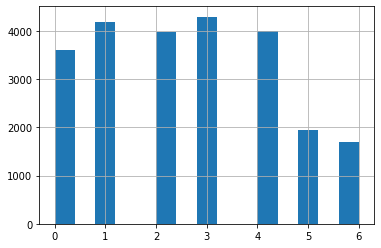

In [35]:
# День публикации
data['weekday'].hist(bins=15)

<AxesSubplot:>

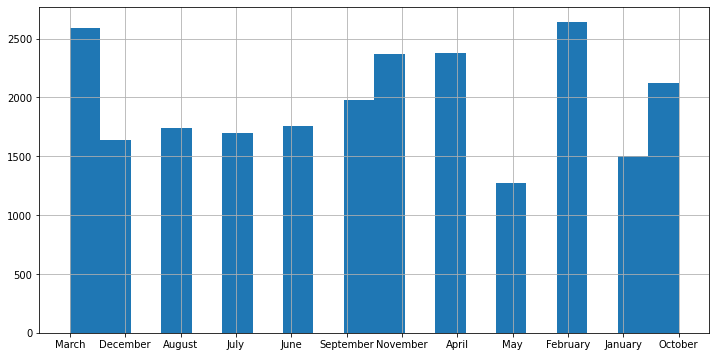

In [36]:
# Месяц публикации
data['month'].hist(bins=20, figsize=(12,6))

В столбцах **"parks_nearest"**, **"weekday"**, **"month"** выделяющихся значений нет.


Выделяется квартира с общей площадью 900 $м^2$. В такое не очень верится, но вдруг... Так что пока оставим её в таблице.<br>Бросается в глаза квартира стоимостью 763 млн. Но зато рядом с центром... Может того стоит, пока оставим её в таблице.<br> Львиная доля квартир находится в районе 25 км от аэропорта. Конечно, не учитывая пропущенные значения.<br> Большинство квартир находятся в 500 метрах от ближайшего парка.


Посмотрим как быстро продавались квартиры.

Среднее значение равно 180.89963441384353
Медиана равна 95.0


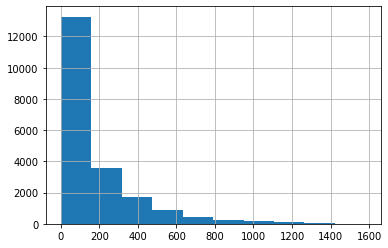

In [37]:
# Избавимся от значений "-1" в стобце days_exposition.
data.query('days_exposition>0')['days_exposition'].hist()
print('Среднее значение равно', data.query('days_exposition > 0')['days_exposition'].mean())
print('Медиана равна', data.query('days_exposition > 0')['days_exposition'].median())

Можно говорить о том, что в среднем продажа занимает около трёх месяцев. Если квартира продаётся за этот срок, то это быстрая продажа. Если срок размещения объявления превышает 200 дней, то это уже долгая продажа. 

<AxesSubplot:>

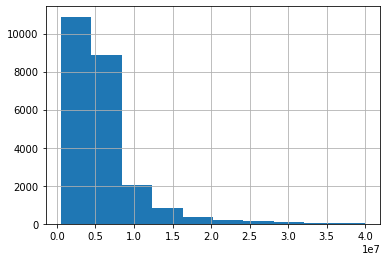

In [39]:
data = data.query('(last_price >= 500000) & (last_price <=40000000)')
data['last_price'].hist()

<AxesSubplot:>

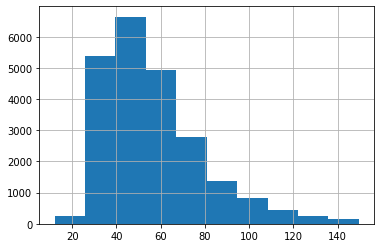

In [40]:
data = data.query('total_area < 150')
data['total_area'].hist()

<AxesSubplot:>

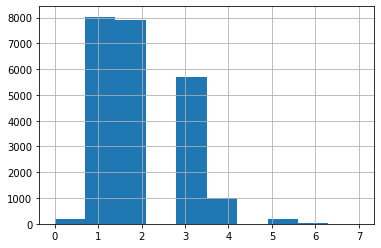

In [41]:
data = data.query('rooms < 8')
data['rooms'].hist()

Рассмотрим какие факторы больше всего влияют на полную стоимость объекта.

<AxesSubplot:title={'center':'Зависимость цены от площади'}, xlabel='площадь', ylabel='цена'>

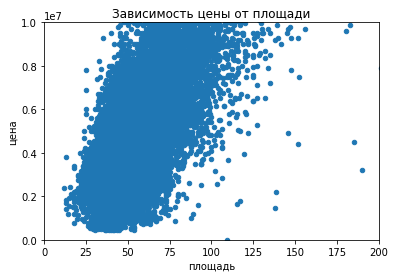

In [82]:
# Total_area
data.plot(kind='scatter', x='total_area',y='last_price', xlim=(0,200), ylim=(0,10000000), title=
         'Зависимость цены от площади', xlabel='площадь', ylabel='цена')

<AxesSubplot:xlabel='living_area', ylabel='last_price'>

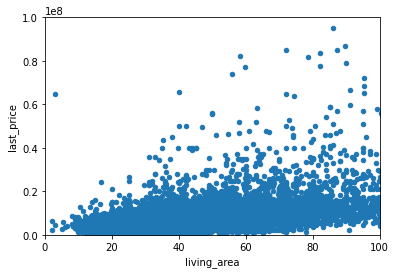

In [20]:
# Living_area
data.plot(kind='scatter', x='living_area', y='last_price', xlim=(0,100), ylim=(0, 100000000))

<AxesSubplot:xlabel='kitchen_area', ylabel='last_price'>

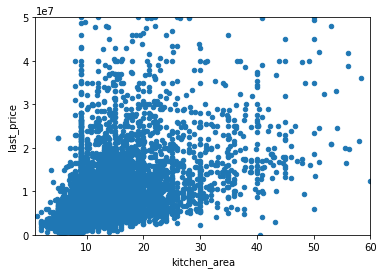

In [83]:
# Kitchen_area
data.plot(kind='scatter', x='kitchen_area', y='last_price', ylim=(0,50000000),xlim=(1,60))

<AxesSubplot:xlabel='rooms', ylabel='last_price'>

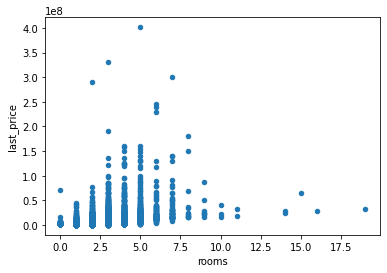

In [90]:
# Rooms
data.plot(kind='scatter', x='rooms', y='last_price')

<AxesSubplot:xlabel='тип этажа', ylabel='цена'>

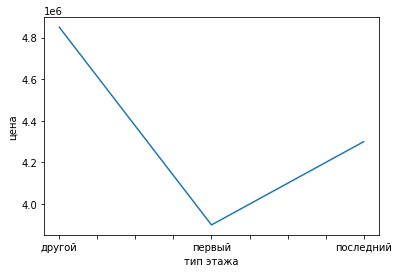

In [93]:
# What_floor
data.groupby('what_floor')['last_price'].median().plot(xlabel='тип этажа', ylabel='цена')

<AxesSubplot:title={'center':'Зависимость цены от дня публикации'}, xlabel='день недели', ylabel='цена'>

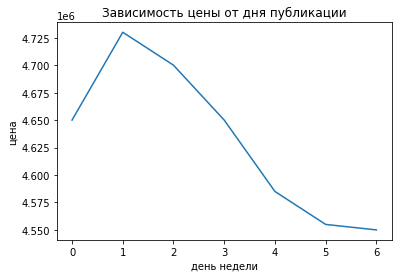

In [105]:
# first_day_exposition,
data.groupby('weekday')['last_price'].median().plot(xlabel='день недели', ylabel='цена',  title='Зависимость цены от дня публикации')

<AxesSubplot:title={'center':'Зависимость цены от месяца публикации'}, xlabel='месяц', ylabel='цена'>

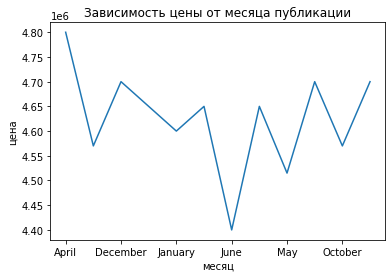

In [104]:
data.groupby('month')['last_price'].median().plot(xlabel='месяц', ylabel='цена',  title='Зависимость цены от месяца публикации')

<AxesSubplot:title={'center':'Зависимость цены от года публикации'}, xlabel='год', ylabel='цена'>

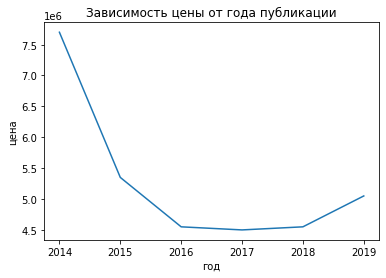

In [103]:
data.groupby('year')['last_price'].median().plot(xlabel='год', ylabel='цена', title='Зависимость цены от года публикации')

Видно, что цена квартиры зависит от общей площади, жилой площади. Также цена имеет положительную корреляцию с площадью кухни. С другой стороны, количество комнат и дата размещения объявления имеют очень слабую корреляцию. Также, дороже стоят квартиры, находящиеся между первым и последним этажами.

Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений.

In [25]:
data_ten_localities = data.pivot_table(index='locality_name', values='price_one_meter')
data_ten_localities['count'] = data.groupby('locality_name')['last_price'].count()
data_ten_localities.sort_values('count', ascending=False).head(10)

,price_one_meter,count
locality_name,,
Санкт-Петербург,114849.008794,15721
поселок Мурино,85681.762601,556
поселок Шушары,78677.364217,440
Всеволожск,68654.473986,398
Пушкин,103125.819291,369
Колпино,75424.579098,338
поселок Парголово,90175.913458,327
Гатчина,68746.146763,307
деревня Кудрово,92473.547576,299


В Санкт-Петербурге в среднем самая высокая стоимость одного квадратного метра, а в Выборге - самая низкая.

Выделим квартиры Санкт-Петербурга и вычислим среднюю цену одного километра до центра города.

<AxesSubplot:title={'center':'Зависимость цены от расстояния до центра'}, xlabel='расстояние до центра', ylabel='цена'>

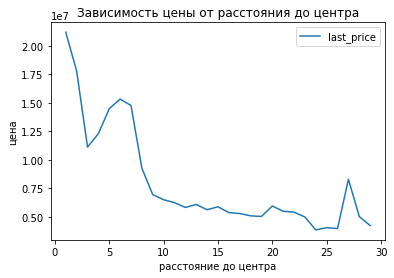

In [107]:
data_only_Saint_Pet = data.query('locality_name == "Санкт-Петербург"')
data_only_Saint_Pet = data_only_Saint_Pet.query('center_km>0')
data_only_Saint_Pet = data_only_Saint_Pet.reset_index(drop=True)
data_price_center_km = data_only_Saint_Pet.pivot_table(index='center_km', values='last_price')
data_price_center_km.plot(xlabel='расстояние до центра', ylabel='цена', title='Зависимость цены от расстояния до центра')

Видно, что чем ближе от квартиры до центра, тем она дороже.

### Общий вывод

Мы изучили объекты, которые есть на рынке недвижимости. Выполнили предобработку данных и их анализ. Заметили интресные закономерности, построив гистограммы и другие графики. Выяснили какие параметры коррелируют с другими. В ходе исследования мы сталкивались со сложностями в работе с данными, поэтому применяли разные методы, которые позволяют нам сделать данные более удобными для работы, для их анализа. Сюда можно отнести заполнение пропусков в значениях, изменение типов данных, нахождение выбросов в данных. 